In [1]:
# import the modules
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")


### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here
train = pd.read_csv('train.csv')
print(train.head(5))
print(train.shape)
print(train.info())
print(train.describe())

test = pd.read_csv('test.csv')
print(test.shape)
print(test.info())
# Code ends here

     Id customer.id credit.policy             purpose int.rate  installment  \
0  6269    LA006270           Yes  debt_consolidation   12.53%       689.41   
1  1460    LA001461           Yes         credit_card   10.20%       485.42   
2  5539    LA005540           Yes  debt_consolidation   12.87%       121.08   
3  9020    LA009021            No           all_other   15.37%       348.47   
4  4365    LA004366           Yes  debt_consolidation   14.61%       344.76   

   log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0       11.513725  14.45   722        4291.000000      13171        51.8   
1       10.315597  12.87   752        5789.958333      14857        31.3   
2       11.238436   1.58   692        3391.000000      12135        85.5   
3       11.142007  11.01   687        5370.000000      10631        35.3   
4       10.308953  11.36   672        2429.958333      10544        57.0   

   pub.rec inq.last.6mths delinq.2yrs paid.back.loan  
0        0   

In [3]:
train.drop(['customer.id'],1,inplace=True)
test.drop(['customer.id'],1,inplace=True)
train['int.rate'] = train['int.rate'].str.replace('%', '')
test['int.rate'] = test['int.rate'].str.replace('%', '')
train = train.astype({"int.rate": float})
test = test.astype({"int.rate": float})



In [ ]:
# encode target variable as integer
train.loc[train['paid.back.loan']=='Yes', 'paid.back.loan'] = 1
train.loc[train['paid.back.loan']=='No', 'paid.back.loan'] = 0

train.loc[train['credit.policy']=='Yes', 'credit.policy'] = 1
train.loc[train['credit.policy']=='No', 'credit.policy'] = 0

train.loc[train['delinq.2yrs']=='Yes', 'delinq.2yrs'] = 1
train.loc[train['delinq.2yrs']=='No', 'delinq.2yrs'] = 0

test.loc[test['credit.policy']=='Yes', 'credit.policy'] = 1
test.loc[test['credit.policy']=='No', 'credit.policy'] = 0

test.loc[test['delinq.2yrs']=='Yes', 'delinq.2yrs'] = 1
test.loc[test['delinq.2yrs']=='No', 'delinq.2yrs'] = 0

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

In [4]:
# choose categorical and continuous features from data

categorical_columns = [c for c in train.columns 
                       if train[c].dtype.name == 'object']
numerical_columns = [c for c in train.columns 
                     if train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs', 'paid.back.loan']
numerical_columns: ['Id', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'pub.rec']


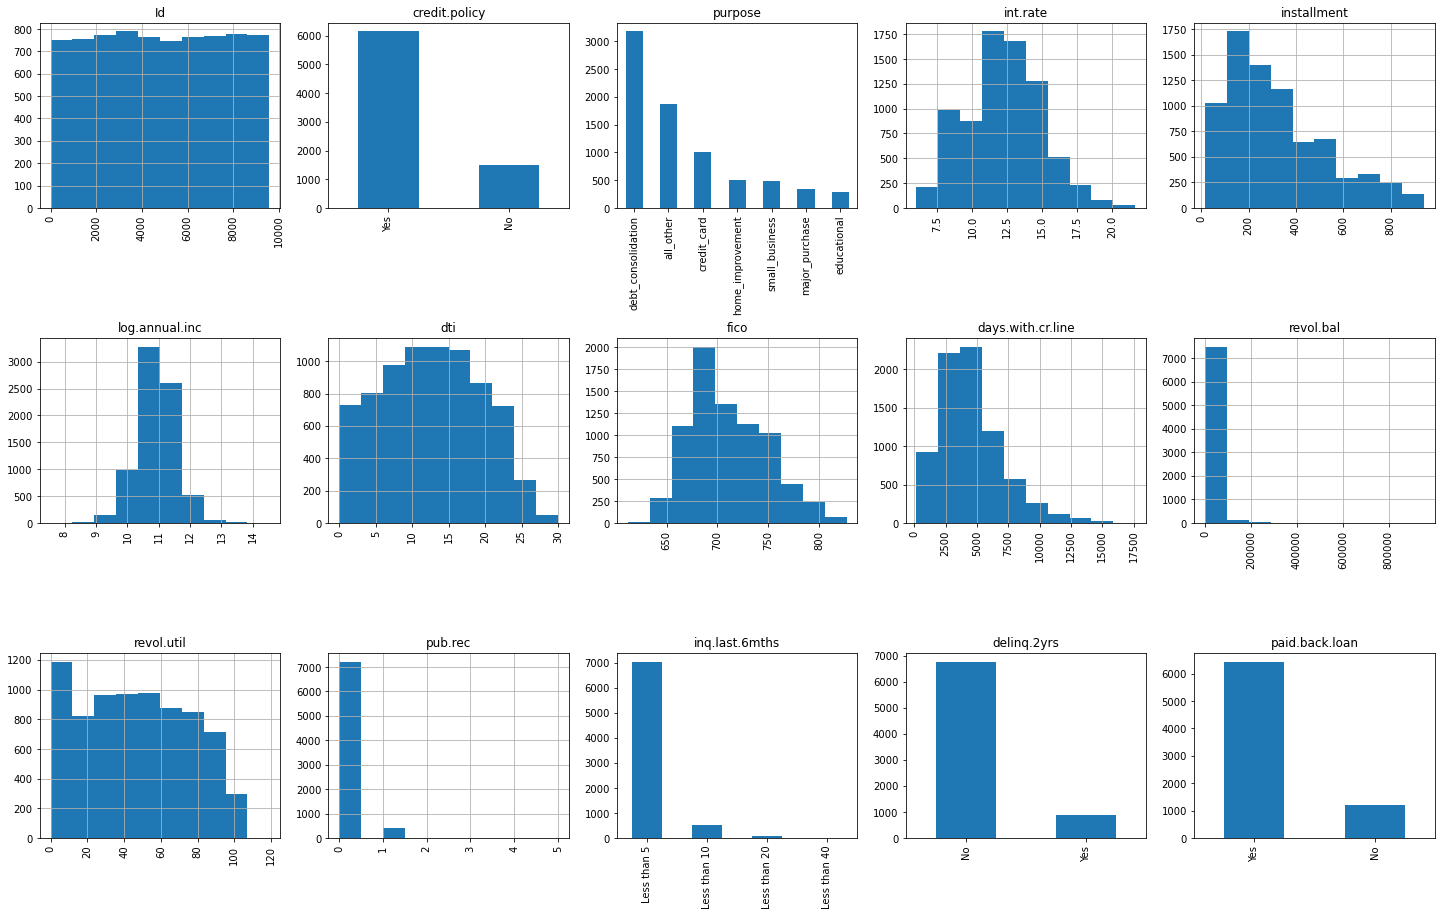

In [5]:
# Code starts here

fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(train.shape[1]) / cols)
for i, column in enumerate(train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# Code ends here.

In [6]:
le = LabelEncoder()

for x in categorical_columns:
    train[x] = le.fit_transform(train[x])
    if x in [c for c in test.columns 
                       if test[c].dtype.name == 'object']:
        test[x] = le.transform(test[x])

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [7]:
# Code Starts here
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

# Code ends here

In [8]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

tree_predictions = tree.predict(X_val) 
print("Decision tree accuracy: ",accuracy_score(y_val,tree_predictions))

Decision tree accuracy:  0.8403653762505437


In [9]:
tree_params = {'max_depth': range(2, 11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  


# Your code here

locally_best_tree.fit(X_train, y_train)

print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)


Best params: {'max_depth': 3}
Best cross validaton score 0.8431848214658302


In [10]:
tuned_tree = DecisionTreeClassifier(max_depth=2, random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_val)
print("Decision tree Accuracy after tuning: ",accuracy_score(y_val, tuned_tree_predictions))

Decision tree Accuracy after tuning:  0.8399304045237059


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [11]:
# Code Starts here

# Storing the id from the test file
id_ = test['Id']

# Predict on the test data
y_pred_test = tree.predict(test)

# Create a sample submission file
final_submission = pd.DataFrame({'Id':id_,'paid.back.loan':y_pred_test})

final_submission.loc[final_submission['paid.back.loan']==1, 'paid.back.loan'] = 'Yes'
final_submission.loc[final_submission['paid.back.loan']==0, 'paid.back.loan'] = 'No'

# Convert the sample submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)

# Code ends here